In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
import os

import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'c:\\Users\\adame\\OneDrive\\Bureau\\CODE\\CandleMagic'

In [3]:
file = "data\\EURUSD_M1_231201_231215.csv"
df = pd.read_csv(file, sep="\t")
df['<DATETIME>'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], format='%Y.%m.%d %H:%M:%S')
df = df.drop(['<DATE>', '<TIME>', '<VOL>', '<SPREAD>' ], axis=1)
df = df[['<DATETIME>'] + [col for col in df.columns if col != '<DATETIME>']]

In [4]:
df['SMA'] = df['<CLOSE>'].rolling(window=10).mean()
df['EMA'] = df['<CLOSE>'].ewm(span=10, adjust=False).mean()

In [5]:
df.iloc[:5]

,<DATETIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,SMA,EMA
0,2023-12-01 00:00:00,1.08845,1.08845,1.08845,1.08845,1,NaN,1.088450
1,2023-12-01 00:01:00,1.08844,1.08877,1.08768,1.08808,11,NaN,1.088383
2,2023-12-01 00:02:00,1.08808,1.08821,1.08764,1.08820,24,NaN,1.088350
3,2023-12-01 00:03:00,1.08830,1.08830,1.08820,1.08820,2,NaN,1.088322
4,2023-12-01 00:04:00,1.08830,1.08835,1.08830,1.08835,2,NaN,1.088327


In [6]:
int(10*0.75)

7

     <CLOSE>       SMA  High_Highs  Higher_Lows  Slope_Positive  Uptrend
0   1.046198       NaN       False        False           False    False
1   1.126925       NaN        True        False           False    False
2   1.654046       NaN        True        False           False    False
3   1.990088       NaN        True        False           False    False
4   2.614597       NaN        True        False           False    False
..       ...       ...         ...          ...             ...      ...
95  3.501917  3.926393        True        False           False    False
96  5.047125  4.053630        True         True            True     True
97  3.792714  4.050150       False        False           False    False
98  5.324819  4.191888        True         True            True     True
99  5.114512  4.223421       False         True            True    False

[100 rows x 6 columns]


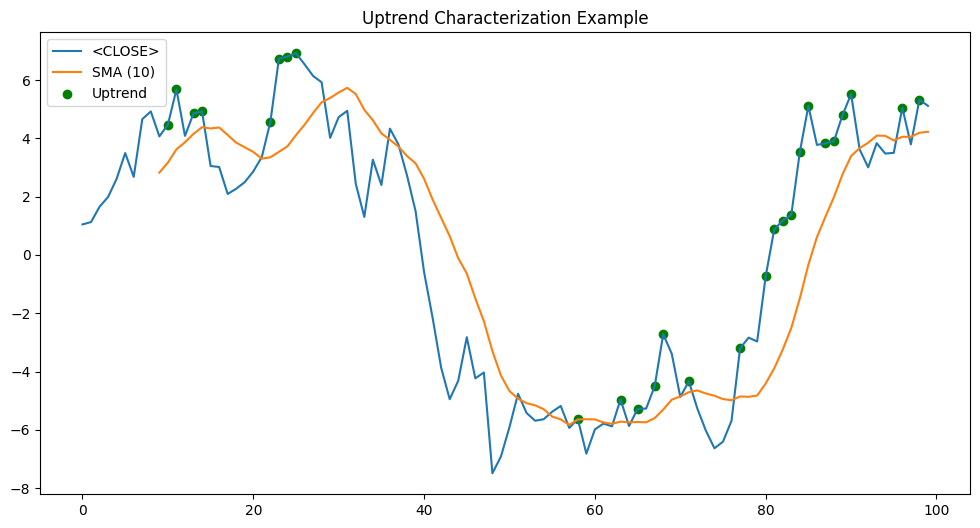

In [7]:
def characterize_uptrend(data, window=10):
    # Create a DataFrame with the time series data
    df = pd.DataFrame(data, columns=['<CLOSE>'])

    # Calculate Simple Moving Average (SMA) with a specified window
    df['SMA'] = df['<CLOSE>'].rolling(window=window).mean()

    # Identify higher highs and higher lows
    df['High_Highs'] = df['<CLOSE>'] > df['<CLOSE>'].shift(1)
    df['Higher_Lows'] = df['<CLOSE>'] > df['SMA']

    # Check for a positive slope of the trendline
    df['Slope_Positive'] = df['SMA'] > df['SMA'].shift(1)

    # Combine conditions to identify uptrend
    df['Uptrend'] = df['High_Highs'] & df['Higher_Lows'] & df['Slope_Positive']

    return df

def uptrend2(data, window = 10):
    df = pd.DataFrame(data, columns=['<CLOSE>'])
    

# Generate sample time series data
data = np.random.randn(100).cumsum()

# Characterize uptrend
result_df = characterize_uptrend(data)

# Print the DataFrame to see the results
print(result_df)

# Plot the data along with SMA and highlight the uptrend
plt.figure(figsize=(12, 6))
plt.plot(result_df['<CLOSE>'], label='<CLOSE>')
plt.plot(result_df['SMA'], label='SMA (10)')
plt.scatter(result_df.index[result_df['Uptrend']], result_df['<CLOSE>'][result_df['Uptrend']], color='green', label='Uptrend')
plt.legend()
plt.title('Uptrend Characterization Example')
plt.show()

In [8]:
filter_condition = (df['<DATETIME>'] > datetime(2023, 12, 4, 0, 0, 0)) & (df['<DATETIME>'] < datetime(2023, 12, 5, 0, 0, 0))

# Apply the filter to the DataFrame
filtered_df = df[filter_condition]

In [9]:
df1 = df[ (df["<DATETIME>"] > datetime(2023, 12, 4, 0, 0, 0)) & (df["<DATETIME>"] < datetime(2023, 12, 5, 0, 0, 0))]

In [10]:
from main import Candle, Market

m = Market(".\\data\\EURUSD_M1_231201_231215.csv")

In [11]:
m.data["<DATETIME>"] > (datetime(2023, 12, 5, 9, 0, 0))

0        False
1        False
2        False
3        False
4        False
         ...  
15517     True
15518     True
15519     True
15520     True
15521     True
Name: <DATETIME>, Length: 15522, dtype: bool

In [12]:
m.fvg["bull"][:20]

[3,
 53,
 54,
 58,
 63,
 80,
 85,
 86,
 97,
 98,
 112,
 120,
 121,
 122,
 124,
 125,
 129,
 130,
 143,
 144]

In [13]:
m.plot(start=datetime(2023, 12, 1, 9, 0, 0), end=datetime(2023, 12, 1, 12, 0, 0), FVG = True)

179


In [14]:
m.getMSSs()

{'bull': [802,
  844,
  845,
  846,
  988,
  1023,
  1097,
  1098,
  1133,
  1134,
  1400,
  1401,
  1670,
  1673,
  1697,
  1698,
  1828,
  1900,
  1901,
  1935,
  2046,
  2151,
  2248,
  2332,
  2632,
  2715,
  2729,
  2826,
  2827,
  2828,
  2968,
  3400,
  3517,
  3533,
  3577,
  3652,
  4027,
  4028,
  4029,
  4255,
  4256,
  5254,
  5329,
  5330,
  5331,
  5689,
  5917,
  5918,
  6266,
  6267,
  6268,
  7246,
  7480,
  8143,
  8237,
  8547,
  8675,
  8704,
  8780,
  9176,
  9177,
  9258,
  9259,
  9366,
  9529,
  9791,
  9792,
  9908,
  9931,
  10122,
  10184,
  10185,
  10391,
  10695,
  10780,
  10793,
  10851,
  11010,
  11054,
  11404,
  11927,
  12006,
  12007,
  12127,
  12170,
  12171,
  12222,
  12223,
  12324,
  12797],
 'bear': [75,
  294,
  13558,
  13641,
  13770,
  13771,
  13863,
  13948,
  14015,
  14169,
  14170,
  14527,
  14633,
  14634,
  14635,
  14858,
  14859,
  15103,
  15104,
  15105,
  15252,
  15253,
  15295,
  15390,
  15490]}